# Crawling and Scraping
### In this section I have loaded the relevant libraries for crawling and scraping, and made a list for each parameter I need for the project

In [1032]:
import pandas as pd
import scipy as sc
import numpy as np
from bs4 import BeautifulSoup
import requests

url = "https://www.ad.co.il/nadlanrent"      # "https://www.ad.co.il/nadlanrent"
r = requests.get(url)
rent_soup = BeautifulSoup(r.content,"html.parser")

In [1033]:
price = list()
property_type = list()#דירה\בית פרטי
area = list()
city = list()
neighborhood = list()
num_of_rooms = list() # מספר חדרים
balconies = list()
floor = list()
name_of_apartment = list()
build_field = list()
garden_field = list()

on_pillar = list()
furnished = list()
air_cond = list()
parking = list()
shelter = list()
balcony = list()
access = list()
bars = list()
elevator = list()
warehouse = list()
sun_terrace = list()
renovated = list()
properties = list()
properties = [on_pillar ,furnished,air_cond,parking,shelter,balcony
         ,access,bars,elevator,warehouse,sun_terrace,renovated]

ad = list()

### In this part, i made a loop that going through all the pages in our website by the next page class. In each page I went through all the ads in each page, for all the pages i took the the relevant characteristics

In [ ]:
number_of_adds = 0
while True:
    count =0
    ads = rent_soup.find("div", id  = "cards").find_all("a")
    for link in ads:
        count += 1
    for i in range(count):
        ad.append(ads[i].get('href'))
        ad_url = 'https://www.ad.co.il' + ad[i]
        r = requests.get(ad_url)
        ad_rent = BeautifulSoup(r.content,"html.parser")
        links = ad_rent.find("div" , attrs = {"class" : "d-flex justify-content-between"}).find_all("h2" ,attrs = {"class" : "card-title"} )
        name_of_apartment.append(links[0].get_text())
        if (len(links) == 2):
            price.append(links[1].get_text().strip(" ₪").replace(',',""))
        else:
            price.append(np.nan)
        number_of_adds += 1
       
        rows = ad_rent("table", attrs = {"class" : "table table-sm mb-4"})[0].find_all("tr")
        column1 = list()
        column2 = list()
        for row in rows:
            col1 = row.find_all('td')[0].get_text().strip(" \r\n")
            col2 = row.find_all('td')[1].get_text().strip(" \r\n")
            column1.append(col1)
            column2.append(col2)
        for ind in range(len(column1)):
            if (column1[ind] == "פרטי הנכס"):
                property_type.append(column2[ind])
            elif (column1[ind] == "אזור"):
                area.append(column2[ind])
            elif (column1[ind] == "עיר"):
                city.append(column2[ind])
            elif (column1[ind] == "שכונה"):
                neighborhood.append(column2[ind])
            elif (column1[ind] == "מרפסות"):
                balconies.append(column2[ind])
            elif (column1[ind] == "שטח גינה"):
                garden_field.append(column2[ind])
            elif (column1[ind] == "חדרים"):
                num_of_rooms.append(column2[ind])
            elif (column1[ind] == "שטח בנוי"):
                build_field.append(column2[ind])
            elif (column1[ind] == "קומה"):
                floor.append(column2[ind])
        if (len(property_type) != number_of_adds):
            property_type.append(np.nan)
        if (len(area) != number_of_adds):
            area.append(np.nan)
        if (len(city) != number_of_adds):
            city.append(np.nan)
        if (len(neighborhood) != number_of_adds):
            neighborhood.append(np.nan)
        if (len(balconies) != number_of_adds):
            balconies.append(np.nan)
        if (len(garden_field) != number_of_adds):
            garden_field.append(np.nan)
        if (len(num_of_rooms) != number_of_adds):
            num_of_rooms.append(np.nan)
        if (len(build_field) != number_of_adds):
            build_field.append(np.nan)
        if (len(floor) != number_of_adds):
            floor.append(np.nan)
        prop = ad_rent.find('div' , attrs  = {"class" : "card-icons flex-wrap d-flex h-100"}).find_all('div')
        j = 0
        for divs in prop:
            class_name = divs['class']
            if (len(class_name) == 3):
                properties[j].append('1')
            else:
                properties[j].append('0')
            j+=1 
    ad.clear()
    if (rent_soup.find("li" ,attrs = {"class" : "page-item mx-1 nextPage"})):
        next_page = rent_soup.find("li" ,attrs = {"class" : "page-item mx-1 nextPage"}).find("a" , attrs ={"class" : "page-link text-nowrap px-3 py-2 rounded-pill"})
        if next_page.get('href'):
            next_page_url = "https://www.ad.co.il" + next_page.get('href')
            #print(next_page_url) # printing the url of the next page for checkimg
            r = requests.get(next_page_url)
            rent_soup = BeautifulSoup(r.content,"html.parser")
            
        else:
            break
    else:
         break
                

### Here, I added all the data that I scriped into a DataFrame

In [156]:
df = pd.DataFrame({'name_of_apartment':name_of_apartment,'price':price,'property_type':property_type,'area':area,
                   'city':city,'neighborhood':neighborhood,'num_of_rooms':num_of_rooms,'balconies':balconies,'floor':floor 
                   , 'build_field':build_field ,'garden_field':garden_field ,'on_pillar':on_pillar,'furnished':furnished
                  ,'air_cond':air_cond,'parking':parking,'shelter':shelter,'access':access,'bars':bars,'elevator':elevator
                 ,'warehouse':warehouse,'sun_terrace':sun_terrace,'renovated':renovated })
df

,name_of_apartment,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,build_field,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
0,הרצל 84,1600,כללי,נס ציונה - רחובות,רחובות,שעריים מזרחי,1,NaN,קרקע מתוך קרקע,8,...,0,1,0,0,1,0,0,0,0,1
1,ד2 אביי 51,4000,דירת גן,בית שמש והסביבה,בית שמש,רמת נריה,3,NaN,קרקע מתוך 8,87,...,0,1,1,1,1,1,1,0,0,0
2,הגפן 16,8500,דו משפחתי,ירושלים והסביבה,מבשרת ציון,NaN,5,3,2 מתוך 3,130,...,0,1,1,0,0,0,0,1,1,1
3,וינגייט 76,2600,דירה,באר שבע והסביבה,באר שבע,שכונה ג,3,NaN,4 מתוך 8,64,...,1,1,1,0,1,1,1,0,0,0
4,"מח""ל 2",8300,דירה,תל אביב,תל אביב יפו,כפיר,5,1,5 מתוך 9,112,...,0,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47558,המייסדים,5900,דירה להשכרה,כרמיאל והסביבה,כרמיאל,המייסדים,3,1,7 מתוך 8,90,...,0,1,1,1,1,1,1,1,1,1
47559,מחנה יהודה,NaN,גג/פנטהאוז להשכרה,ירושלים והסביבה,ירושלים,מחנה יהודה,7,3,4 מתוך 5,300,...,0,1,1,1,1,0,1,0,1,1
47560,ד''ר סטופ,3000,דירה להשכרה,נתניה והסביבה,נתניה,נאות שקד,3,NaN,3 מתוך 3,75,...,0,1,0,0,0,0,0,0,0,1
47561,מורדי הגטאות,NaN,פרטי/קוטג' להשכרה,חדרה וישובי עמק חפר,חדרה,בית אליעזר,2,NaN,קרקע מתוך קרקע,45,...,0,1,0,0,0,0,0,0,0,0


In [157]:
df.to_csv('yarin_data_science_project_updated3.csv')

In [32]:
data = pd.read_csv("yarin_data_science_project_updated3.csv")

In [33]:
data

,Unnamed: 0,name_of_apartment,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
0,0,הרצל 84,1600.0,כללי,נס ציונה - רחובות,רחובות,שעריים מזרחי,1.0,NaN,קרקע מתוך קרקע,...,0,1,0,0,1,0,0,0,0,1
1,1,ד2 אביי 51,4000.0,דירת גן,בית שמש והסביבה,בית שמש,רמת נריה,3.0,NaN,קרקע מתוך 8,...,0,1,1,1,1,1,1,0,0,0
2,2,הגפן 16,8500.0,דו משפחתי,ירושלים והסביבה,מבשרת ציון,NaN,5.0,3.0,2 מתוך 3,...,0,1,1,0,0,0,0,1,1,1
3,3,וינגייט 76,2600.0,דירה,באר שבע והסביבה,באר שבע,שכונה ג,3.0,NaN,4 מתוך 8,...,1,1,1,0,1,1,1,0,0,0
4,4,"מח""ל 2",8300.0,דירה,תל אביב,תל אביב יפו,כפיר,5.0,1.0,5 מתוך 9,...,0,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47558,47558,המייסדים,5900.0,דירה להשכרה,כרמיאל והסביבה,כרמיאל,המייסדים,3.0,1.0,7 מתוך 8,...,0,1,1,1,1,1,1,1,1,1
47559,47559,מחנה יהודה,NaN,גג/פנטהאוז להשכרה,ירושלים והסביבה,ירושלים,מחנה יהודה,7.0,3.0,4 מתוך 5,...,0,1,1,1,1,0,1,0,1,1
47560,47560,ד''ר סטופ,3000.0,דירה להשכרה,נתניה והסביבה,נתניה,נאות שקד,3.0,NaN,3 מתוך 3,...,0,1,0,0,0,0,0,0,0,1
47561,47561,מורדי הגטאות,NaN,פרטי/קוטג' להשכרה,חדרה וישובי עמק חפר,חדרה,בית אליעזר,2.0,NaN,קרקע מתוך קרקע,...,0,1,0,0,0,0,0,0,0,0


In [34]:
data.describe(include = 'all')
    

,Unnamed: 0,name_of_apartment,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
count,47563.000000,45957,4.509800e+04,47519,46364,47553,34945,45791.000000,24853.000000,47080,...,47563.000000,47563.000000,47563.000000,47563.000000,47563.000000,47563.000000,47563.000000,47563.000000,47563.000000,47563.000000
unique,NaN,25019,NaN,92,39,838,723,NaN,NaN,665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,מרכז העיר,NaN,דירה,תל אביב,תל אביב יפו,מרכז העיר,NaN,NaN,קרקע מתוך קרקע,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,368,NaN,31052,6893,6893,1771,NaN,NaN,6328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23781.000000,NaN,5.967388e+03,NaN,NaN,NaN,NaN,3.403343,1.222066,NaN,...,0.367239,0.885058,0.559889,0.342367,0.274499,0.256649,0.370078,0.241343,0.522528,0.507222
std,13730.399764,NaN,1.382191e+04,NaN,NaN,NaN,NaN,1.337840,0.498728,NaN,...,0.482058,0.318956,0.496406,0.474507,0.446266,0.436789,0.482830,0.427902,0.499497,0.499953
min,0.000000,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11890.500000,NaN,3.000000e+03,NaN,NaN,NaN,NaN,2.500000,1.000000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23781.000000,NaN,4.400000e+03,NaN,NaN,NaN,NaN,3.000000,1.000000,NaN,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,35671.500000,NaN,6.800000e+03,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [993]:
new_df = data.copy()
new_df

,Unnamed: 0,name_of_apartment,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
0,0,הרצל 84,1600.0,כללי,נס ציונה - רחובות,רחובות,שעריים מזרחי,1.0,NaN,קרקע מתוך קרקע,...,0,1,0,0,1,0,0,0,0,1
1,1,ד2 אביי 51,4000.0,דירת גן,בית שמש והסביבה,בית שמש,רמת נריה,3.0,NaN,קרקע מתוך 8,...,0,1,1,1,1,1,1,0,0,0
2,2,הגפן 16,8500.0,דו משפחתי,ירושלים והסביבה,מבשרת ציון,NaN,5.0,3.0,2 מתוך 3,...,0,1,1,0,0,0,0,1,1,1
3,3,וינגייט 76,2600.0,דירה,באר שבע והסביבה,באר שבע,שכונה ג,3.0,NaN,4 מתוך 8,...,1,1,1,0,1,1,1,0,0,0
4,4,"מח""ל 2",8300.0,דירה,תל אביב,תל אביב יפו,כפיר,5.0,1.0,5 מתוך 9,...,0,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47558,47558,המייסדים,5900.0,דירה להשכרה,כרמיאל והסביבה,כרמיאל,המייסדים,3.0,1.0,7 מתוך 8,...,0,1,1,1,1,1,1,1,1,1
47559,47559,מחנה יהודה,NaN,גג/פנטהאוז להשכרה,ירושלים והסביבה,ירושלים,מחנה יהודה,7.0,3.0,4 מתוך 5,...,0,1,1,1,1,0,1,0,1,1
47560,47560,ד''ר סטופ,3000.0,דירה להשכרה,נתניה והסביבה,נתניה,נאות שקד,3.0,NaN,3 מתוך 3,...,0,1,0,0,0,0,0,0,0,1
47561,47561,מורדי הגטאות,NaN,פרטי/קוטג' להשכרה,חדרה וישובי עמק חפר,חדרה,בית אליעזר,2.0,NaN,קרקע מתוך קרקע,...,0,1,0,0,0,0,0,0,0,0


# Data Handling
## Missing Values

### First of all, there is 2 columns that their values are not relevant and wont affect on our machine learning model so we can delete them

In [994]:
new_df.drop(columns=["Unnamed: 0"],inplace=True) #Deleting an unnecessary column
new_df.drop(columns=["name_of_apartment"],inplace=True)

new_df

,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,build_field,garden_field,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
0,1600.0,כללי,נס ציונה - רחובות,רחובות,שעריים מזרחי,1.0,NaN,קרקע מתוך קרקע,8.0,NaN,...,0,1,0,0,1,0,0,0,0,1
1,4000.0,דירת גן,בית שמש והסביבה,בית שמש,רמת נריה,3.0,NaN,קרקע מתוך 8,87.0,130.0,...,0,1,1,1,1,1,1,0,0,0
2,8500.0,דו משפחתי,ירושלים והסביבה,מבשרת ציון,NaN,5.0,3.0,2 מתוך 3,130.0,NaN,...,0,1,1,0,0,0,0,1,1,1
3,2600.0,דירה,באר שבע והסביבה,באר שבע,שכונה ג,3.0,NaN,4 מתוך 8,64.0,NaN,...,1,1,1,0,1,1,1,0,0,0
4,8300.0,דירה,תל אביב,תל אביב יפו,כפיר,5.0,1.0,5 מתוך 9,112.0,NaN,...,0,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47558,5900.0,דירה להשכרה,כרמיאל והסביבה,כרמיאל,המייסדים,3.0,1.0,7 מתוך 8,90.0,NaN,...,0,1,1,1,1,1,1,1,1,1
47559,NaN,גג/פנטהאוז להשכרה,ירושלים והסביבה,ירושלים,מחנה יהודה,7.0,3.0,4 מתוך 5,300.0,NaN,...,0,1,1,1,1,0,1,0,1,1
47560,3000.0,דירה להשכרה,נתניה והסביבה,נתניה,נאות שקד,3.0,NaN,3 מתוך 3,75.0,NaN,...,0,1,0,0,0,0,0,0,0,1
47561,NaN,פרטי/קוטג' להשכרה,חדרה וישובי עמק חפר,חדרה,בית אליעזר,2.0,NaN,קרקע מתוך קרקע,45.0,NaN,...,0,1,0,0,0,0,0,0,0,0


## Remove duplicates rows

In [995]:
data.duplicated().sum()

0

### As you can see, there is no duplicated rows

## Convertions
### First we should convert the garden_field and balconies column, we can see that there is a lot of NaN data, every NaN we will replace with 0.

In [996]:
new_df['garden_field'] = new_df['garden_field'].fillna(0)
new_df['balconies'] = new_df['balconies'].fillna(0)

new_df.garden_field.isnull().sum()
new_df.balconies.isnull().sum()

0

### In this section, I  had to change the values of columns who have a problematic formating, like data type and other creterias.

In [997]:
new_df['floor'] = new_df['floor'].str.replace(" קרקע","one")
new_df['floor'] = new_df['floor'].str.replace("one","1")
new_df['floor'] = new_df['floor'].str.extract('(^\d*)')

In [998]:
new_df["floor"] = pd.to_numeric(new_df["floor"],errors='coerce',downcast = 'float' )
new_df["floor"] = new_df["floor"].astype('float64')
new_df.dtypes

price            float64
property_type     object
area              object
city              object
neighborhood      object
num_of_rooms     float64
balconies        float64
floor            float64
build_field      float64
garden_field     float64
on_pillar          int64
furnished          int64
air_cond           int64
parking            int64
shelter            int64
access             int64
bars               int64
elevator           int64
warehouse          int64
sun_terrace        int64
renovated          int64
dtype: object

### Now, we will remove all rows with a NaN data in the price column. if we dont have a price its unnecessary to our project

In [999]:
new_df.price.isnull().sum()

2465

In [1000]:
new_df.dropna(subset = ['price'], how = 'all' , inplace = True)
new_df.price.isnull().sum()


0

### Now, we will remove all the null values in our dataframe

In [1001]:
new_df.dropna(axis = 0 , how = 'any',inplace=True)
new_df

,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,build_field,garden_field,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
3,2600.0,דירה,באר שבע והסביבה,באר שבע,שכונה ג,3.0,0.0,4.0,64.0,0.0,...,1,1,1,0,1,1,1,0,0,0
4,8300.0,דירה,תל אביב,תל אביב יפו,כפיר,5.0,1.0,5.0,112.0,0.0,...,0,1,1,1,0,0,1,0,1,1
6,10000.0,דירה,תל אביב,תל אביב יפו,אזורי חן,3.0,1.0,7.0,110.0,0.0,...,0,1,1,0,0,0,1,0,1,1
8,7800.0,דירה,חולון - בת ים,בת ים,אזור התעשייה,4.0,1.0,20.0,115.0,14.0,...,0,1,1,1,1,0,1,1,1,1
11,6300.0,דירה,רמת גן - גבעתיים,רמת גן,החרוזים,3.0,0.0,2.0,65.0,0.0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47554,4700.0,דירה להשכרה,רמת גן - גבעתיים,גבעתיים,תל גנים,3.0,1.0,3.0,80.0,0.0,...,0,1,0,0,0,0,0,0,1,1
47555,2400.0,דירה להשכרה,רמלה - לוד,לוד,רסקו,4.0,0.0,3.0,80.0,0.0,...,0,0,1,0,0,1,0,0,0,1
47557,11000.0,דירה להשכרה,גליל ועמקים,נצרת עילית,בן גוריון,3.0,0.0,1.0,75.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47558,5900.0,דירה להשכרה,כרמיאל והסביבה,כרמיאל,המייסדים,3.0,1.0,7.0,90.0,0.0,...,0,1,1,1,1,1,1,1,1,1


### Now, we will change all the object columns to numeric columns

In [1002]:
new_df.dtypes

price            float64
property_type     object
area              object
city              object
neighborhood      object
num_of_rooms     float64
balconies        float64
floor            float64
build_field      float64
garden_field     float64
on_pillar          int64
furnished          int64
air_cond           int64
parking            int64
shelter            int64
access             int64
bars               int64
elevator           int64
warehouse          int64
sun_terrace        int64
renovated          int64
dtype: object

### As you can see we have 4 columns that there type is float and they don't need to be float so i will convert them to int type


In [1003]:
new_df['build_field'] = new_df['build_field'].astype(int)
new_df['garden_field'] = new_df['garden_field'].astype(int)
new_df['balconies'] = new_df['balconies'].astype(int)
new_df['floor'] = new_df['floor'].astype(int)

# EDA and Visualization

In [1021]:
import matplotlib as mpl
from matplotlib import pyplot
import seaborn as sns
import os
!pip install python-bidi
from bidi import algorithm as bidalg
from matplotlib import pyplot as plt
%matplotlib inline

In [1005]:
from bidi import algorithm as bidialg

### Distribution of house's amount per city/area

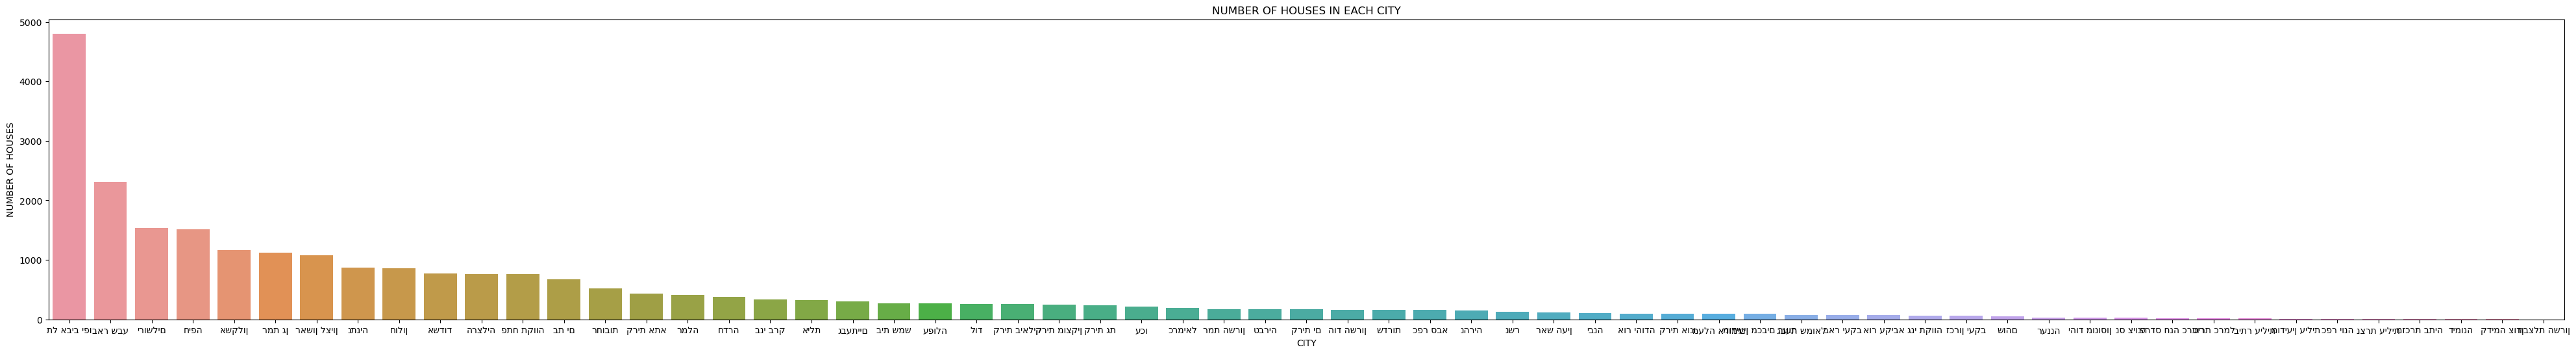

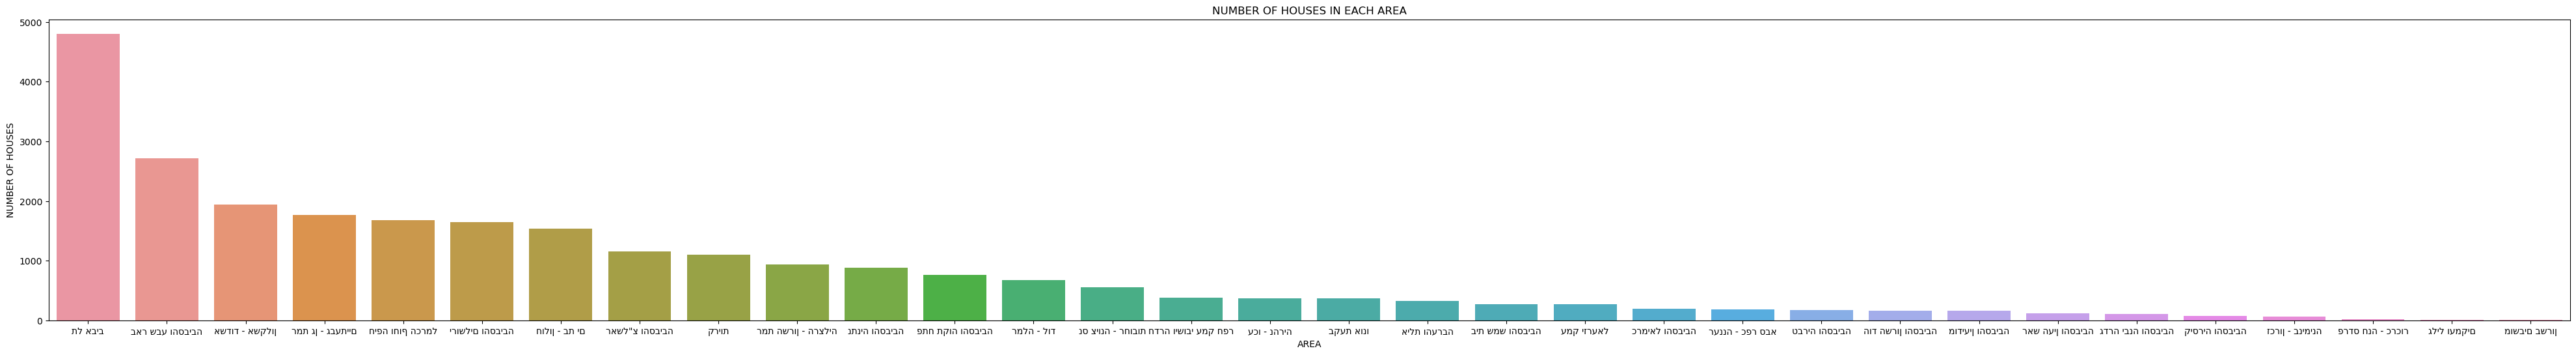

In [1006]:
parameters = ['city','area']
for col in parameters:
    fig, ax = plt.subplots(figsize=(50,6))
    sns.countplot(x=new_df[col],ax=ax,order=new_df[col].value_counts().index)
    ax.set_title(f'NUMBER OF HOUSES IN EACH {col.upper()}')
    ax.set_xlabel(col.upper())
    f'AVERAGE {col.upper()}'
    ax.set_ylabel('NUMBER OF HOUSES')
    if not os.path.exists('static/Overall'):
        os.makedirs('static/Overall')
    plt.savefig(os.path.join('static/Overall', 'n_houses.png'))
    plt.show()

### From this visualization we can see how the amount of houses that offered to rent are distribution in Israel by cities\areas. we can infer that most of the houses that offered to rent are from the center of the country and particularly from Tel-Aviv

### Distribution of average prices for different areas and cities

In [1007]:
# create a list of columns to be analyszed numerically for all cities
overall_numerical_cols = ['price','build_field']

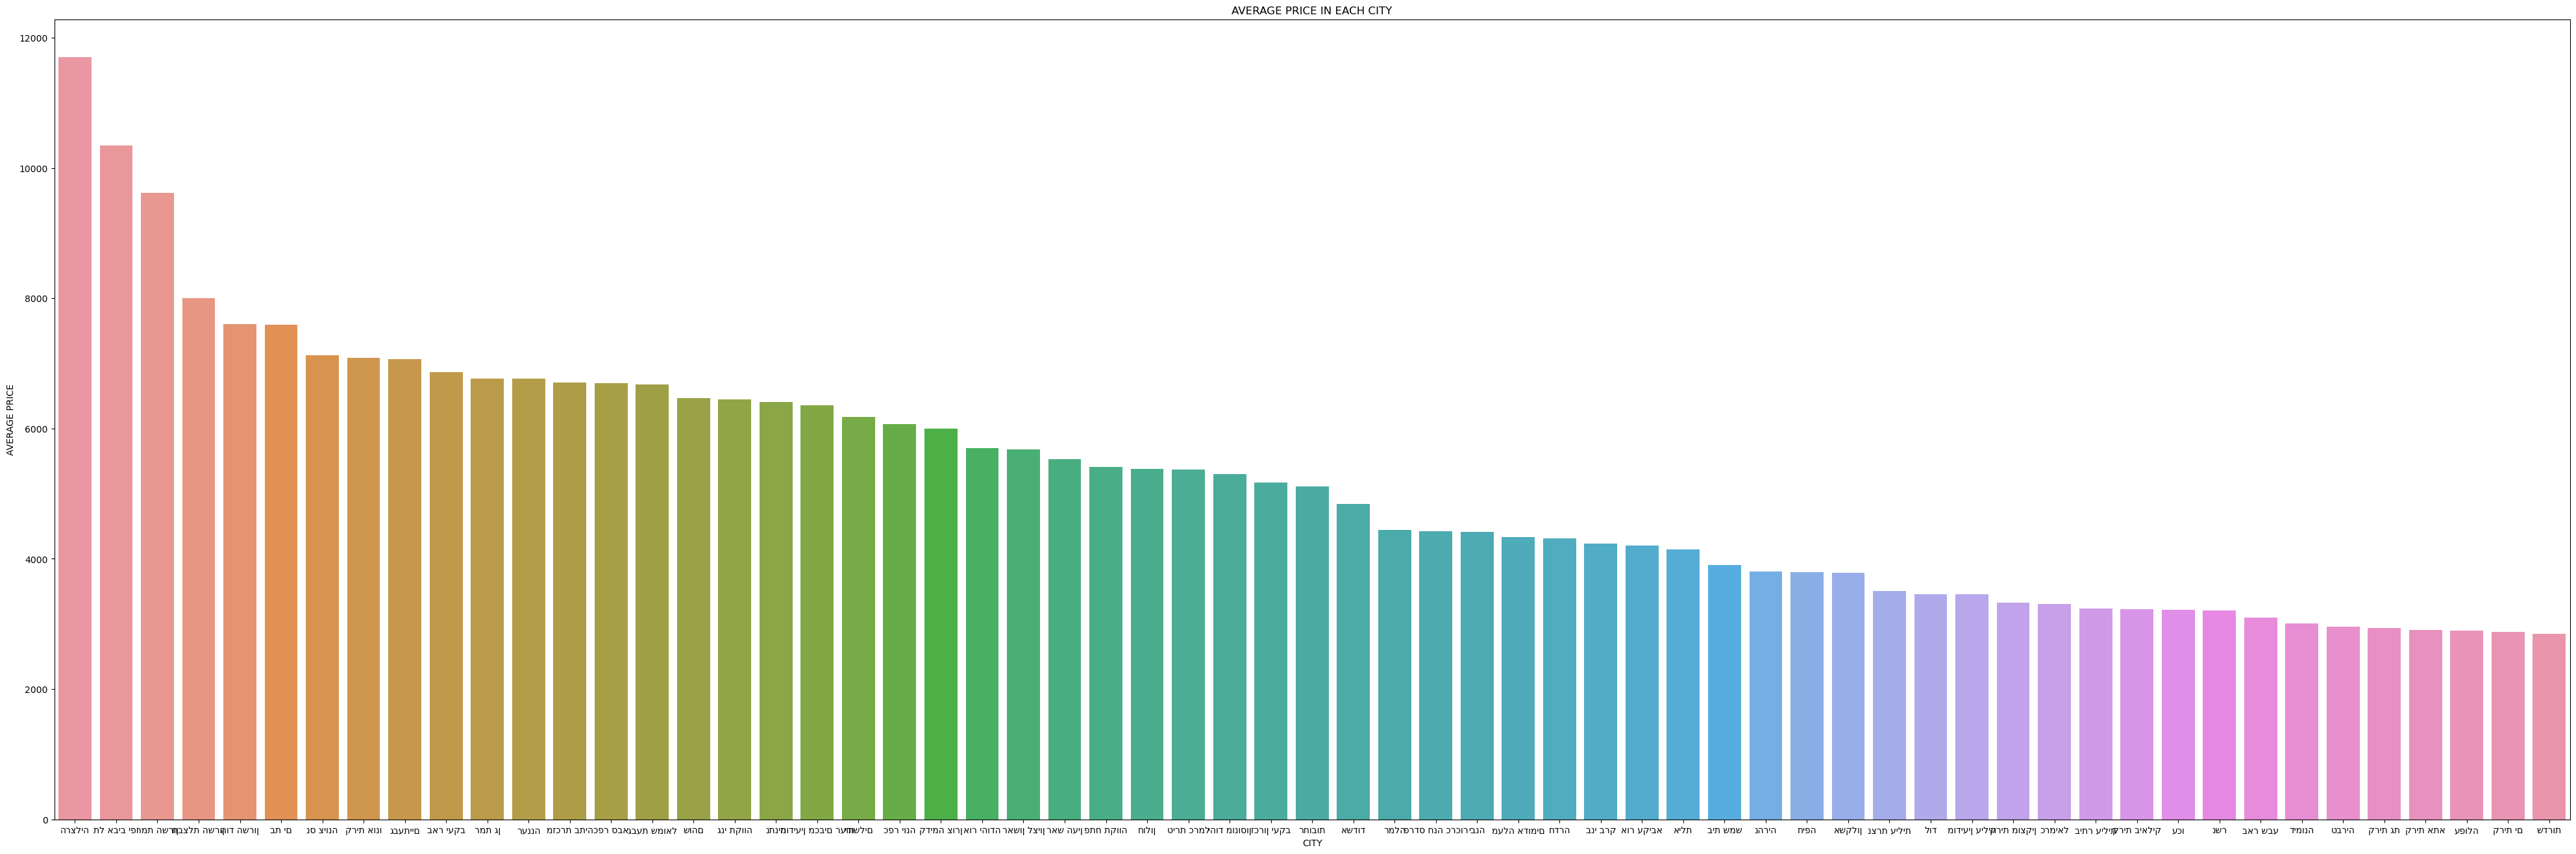

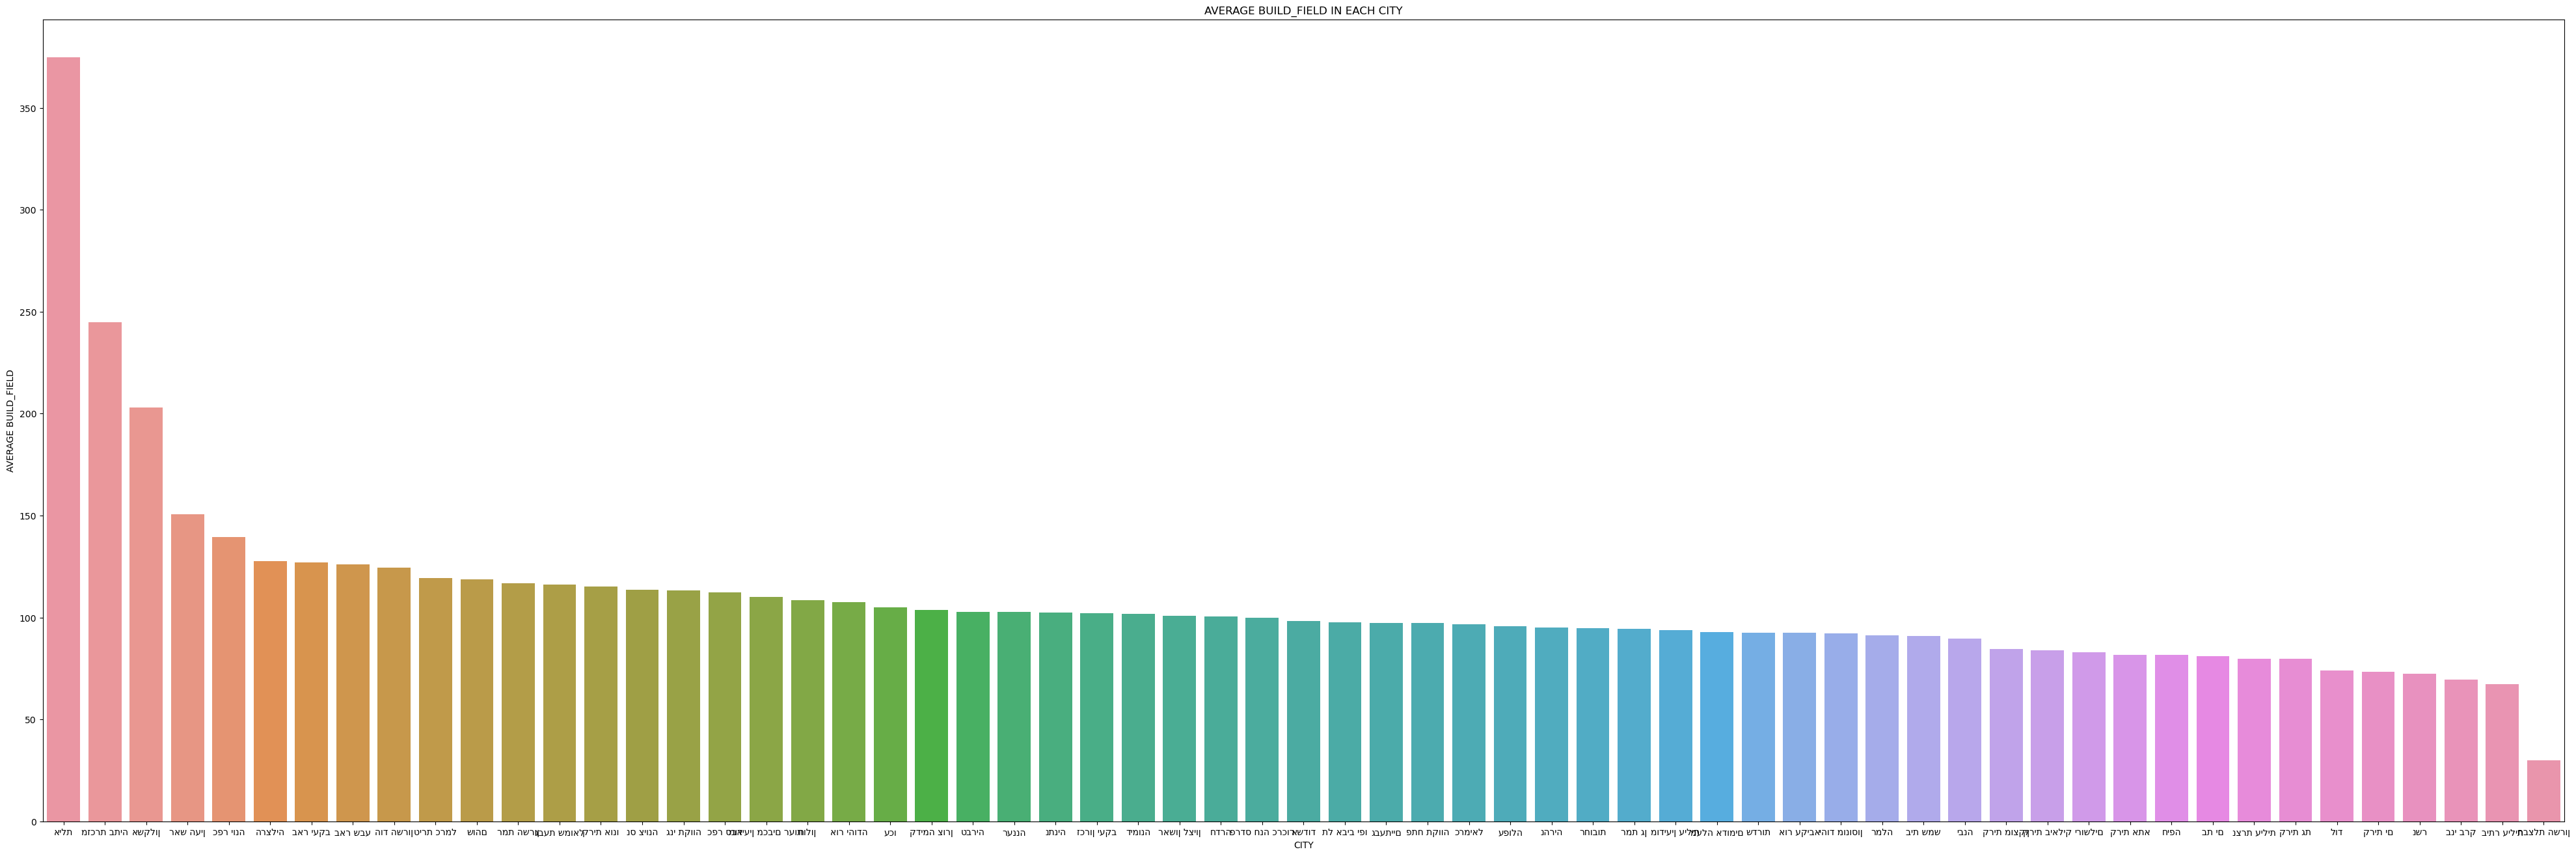

In [1008]:
for col in overall_numerical_cols:
    fig, ax = plt.subplots(figsize=(50,16))
    mean_df = new_df.groupby(by=['city'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(x=mean_df.index, y=mean_df, ax=ax)
    ax.set_xlabel('CITY')
    ax.set_ylabel(f'AVERAGE {col.upper()}')
    ax.set_title(f'AVERAGE {col.upper()} IN EACH CITY')
    plt.savefig(os.path.join('static/Overall', f'{col}.png'))
    plt.show()


### From this barplot we can see that the rent prices are more expensive at the center of the country and a much cheaper in the periphery

### At this point, I decided to make a heatmap. The colors shows how strong the connection between 2 columns, the closer they are to 1, the conection between them is stronger.

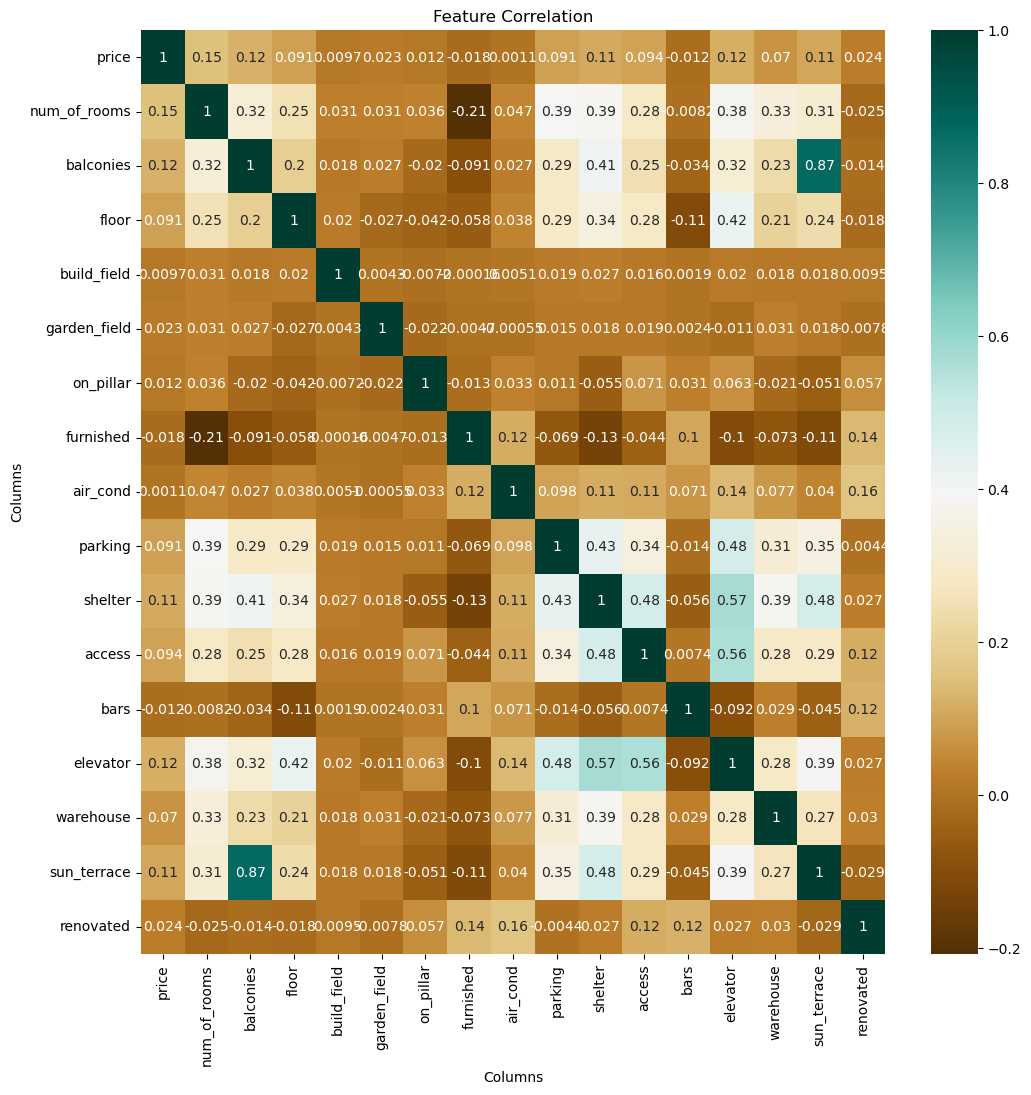

In [1009]:
fig,ax =plt.subplots(figsize =(12,12))
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix,annot = True,ax=ax
           ,cmap = 'BrBG').set(title = 'Feature Correlation',xlabel ='Columns',
                              ylabel = 'Columns')
ax.set_yticklabels(corr_matrix.columns,rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom':True},{'ytick.left':True})

## Insights from the correlation map
### - An expected strong relation between the sun_terrace column and balconies column
### - An unexpected bad relation between the num_of_rooms column and build_field column
### - An expected good relation between elevator column and access column
### - An unexpected good relation between elevator column and parking and shelter columns
### - An unexpected bad relation between all the columns and price column

### In this section, I decided to see the conection between the numbers of room ,floor and balconies of the house to their price.

In [1010]:
# create a list of columns to be analyszed like numbers of rooms and floor
num_columns = ['num_of_rooms','floor','balconies']

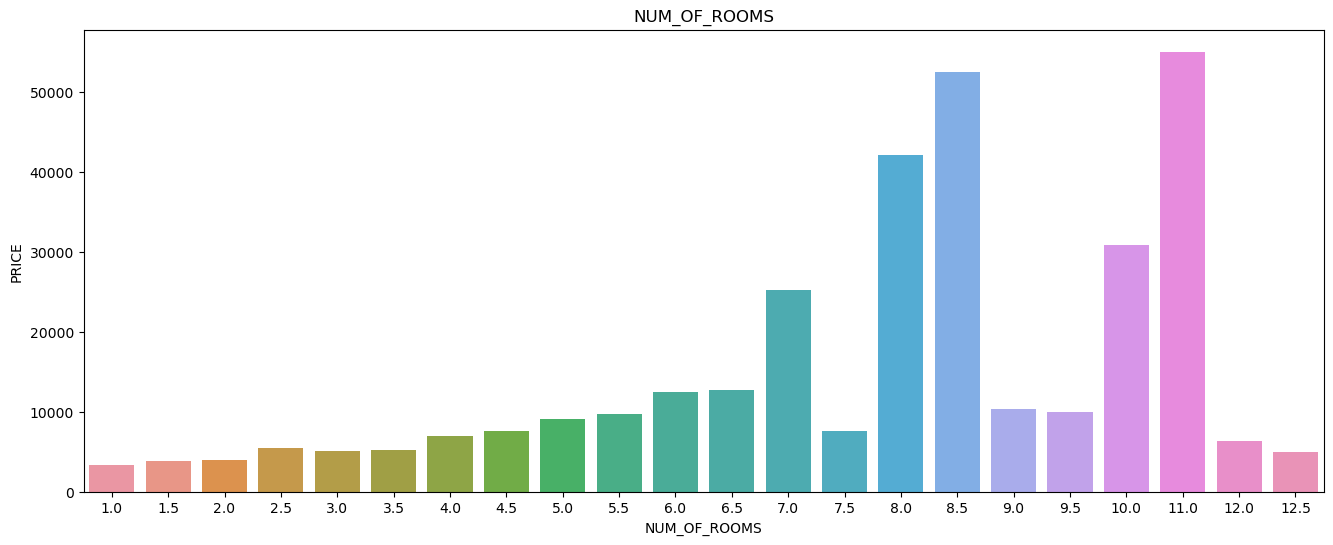

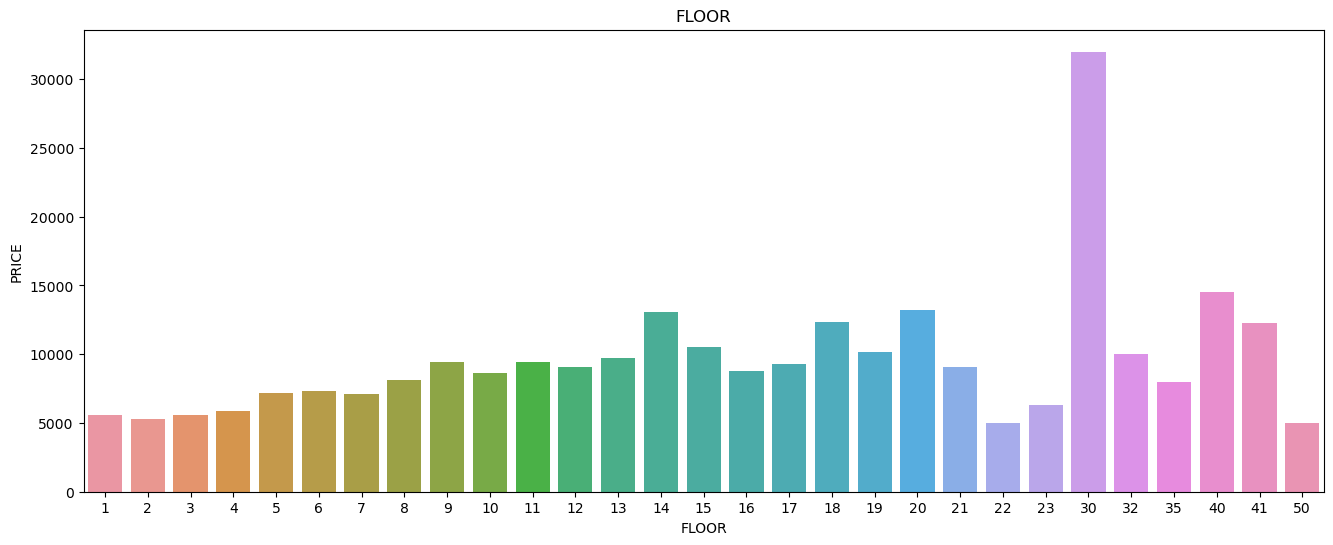

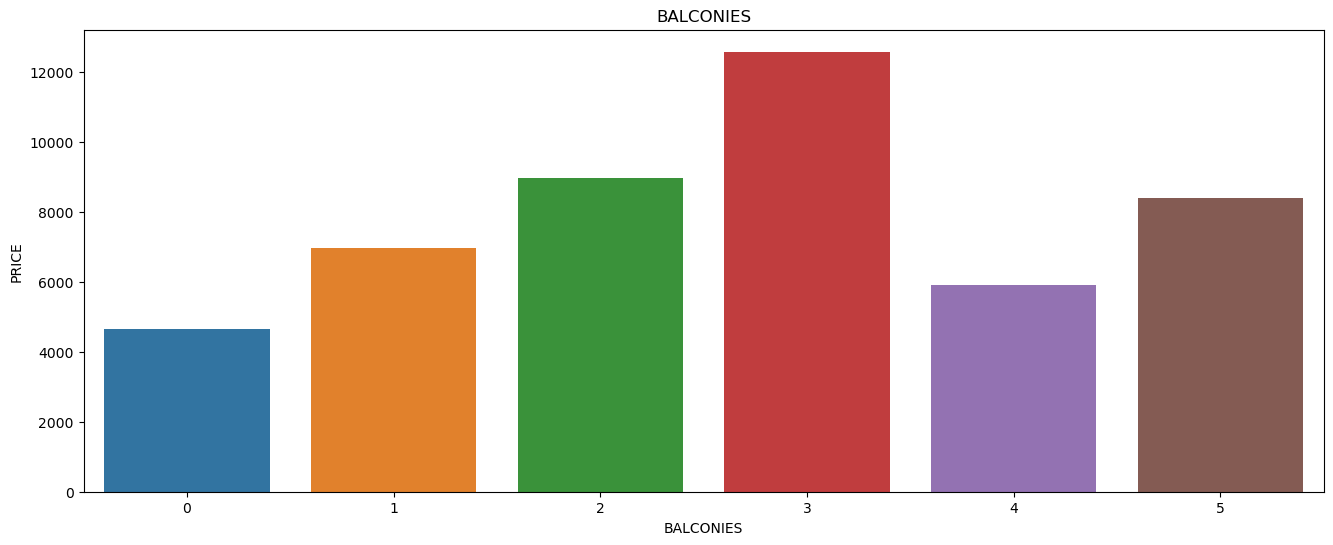

In [1011]:
for col in num_columns:
    fig, ax = plt.subplots(figsize=(16,6))
    mean_df = new_df.groupby(by=[col])['price'].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(x=mean_df.index, y=mean_df, ax=ax)
    ax.set_xlabel(col.upper())
    ax.set_ylabel('PRICE')
    ax.set_title(col.upper())
    plt.savefig(os.path.join('static/Overall', f'{col}.png'))
    plt.show()

### From those graphs we can see that the price does increase depending on number of room and balconies of the property (there are some exceptions), and the floor does not changes the price of the apartment overall 

### For all the binary columns lets make a barplot to see if they have an affect on the price of the property

In [1012]:
binary_columns =['on_pillar','furnished','air_cond','parking','shelter','access','bars','elevator','warehouse'
                ,'sun_terrace','renovated']

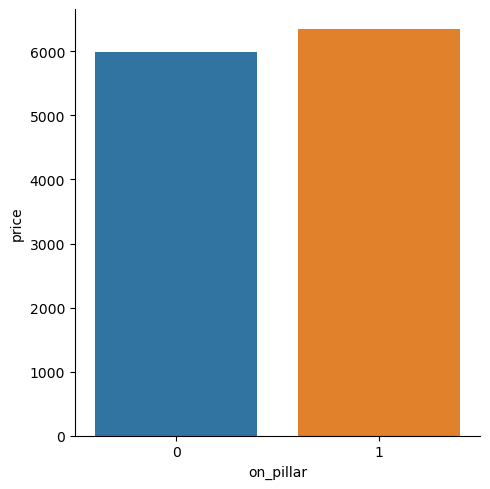

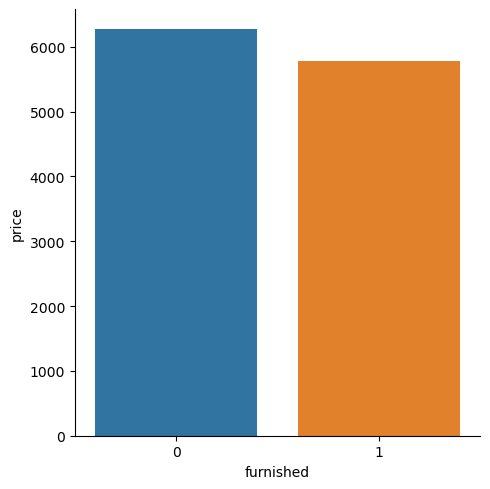

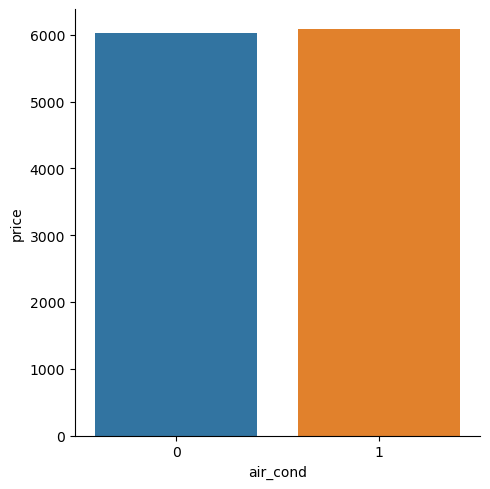

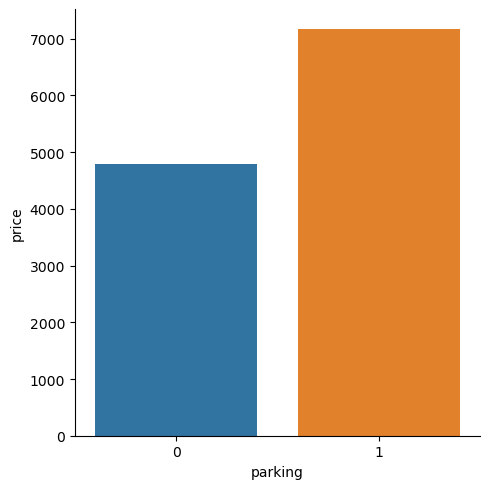

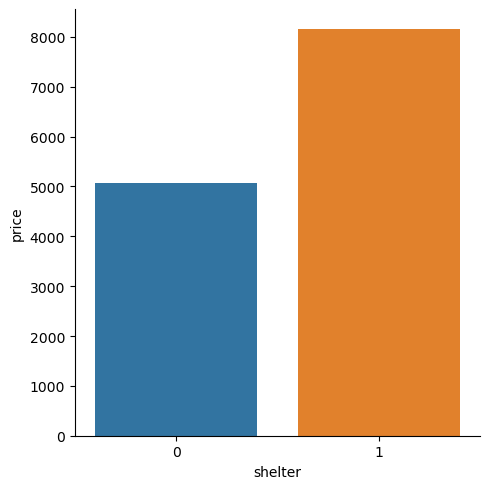

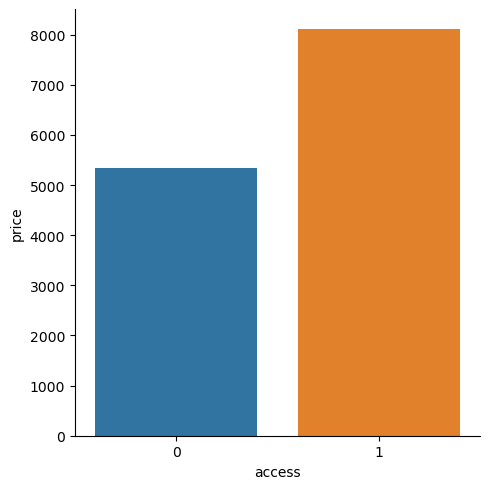

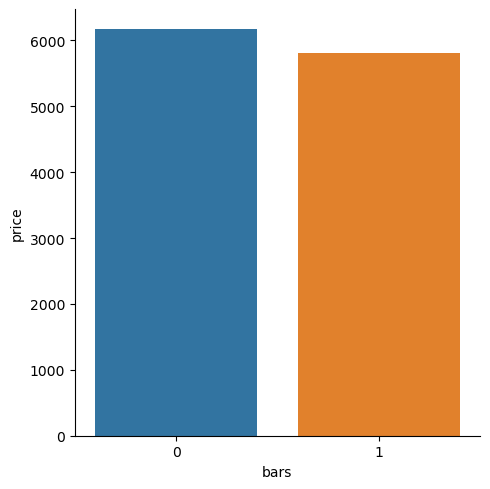

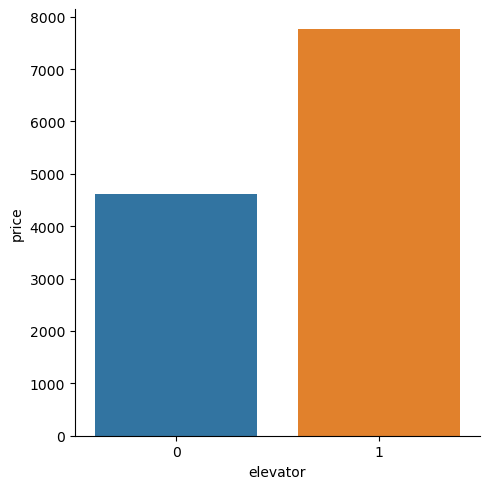

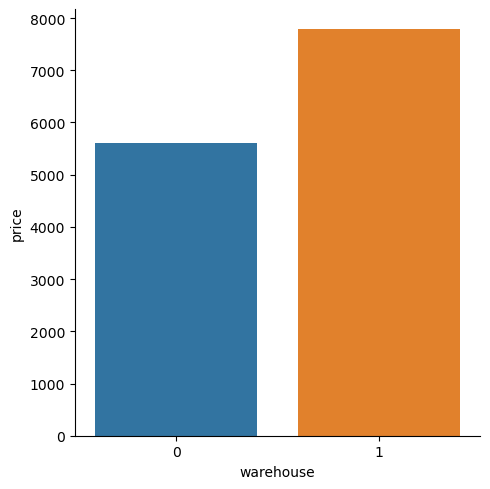

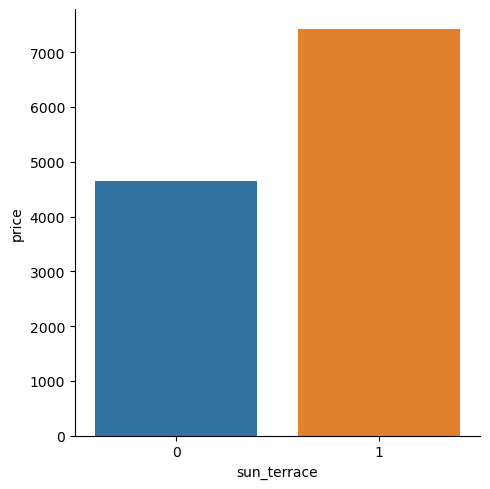

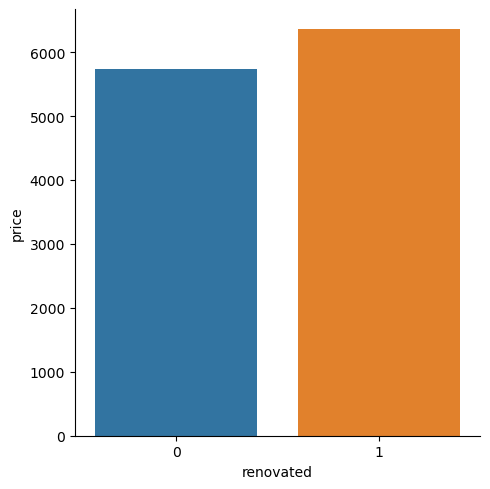

In [1026]:
for col in binary_columns:
    sns.catplot(x=col,y='price',kind ='bar',ci = False,data = new_df)

### From this visualizations we can see if there is binary columns that have a big impact on the property price, for example we can see that houses that have parking,shelter,acces,elevator,warehouse, sun terrace are more tend to increase  the price of the property

# Machine Learning 

### First of all, lets make all our categorical columns to numeric columns

In [958]:
import sklearn 
from sklearn import preprocessing

In [959]:
categorical_columns =['property_type','area','city','neighborhood']
for col in categorical_columns:
    new_df[col] = sklearn.preprocessing.LabelEncoder().fit_transform(new_df[col])
new_df.head()

,price,property_type,area,city,neighborhood,num_of_rooms,balconies,floor,build_field,garden_field,...,furnished,air_cond,parking,shelter,access,bars,elevator,warehouse,sun_terrace,renovated
3,2600.0,10,2,6,664,3.0,0,4,64,0,...,1,1,1,0,1,1,1,0,0,0
4,8300.0,10,31,60,246,5.0,1,5,112,0,...,0,1,1,1,0,0,1,0,1,1
6,10000.0,10,31,60,24,3.0,1,7,110,0,...,0,1,1,0,0,0,1,0,1,1
8,7800.0,10,10,10,21,4.0,1,20,115,14,...,0,1,1,1,1,0,1,1,1,1
11,6300.0,10,28,55,150,3.0,0,2,65,0,...,0,1,1,0,0,1,0,0,0,1


## Train Test Split

### After I converted all the columns to numbers, the data can be split into train\test sets

In [960]:
from sklearn.model_selection import train_test_split

X = new_df.drop(['price'],axis = 1)
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [961]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 25396
Total # of sample in train dataset: 20316
Total # of sample in test dataset: 5080


## Normalization

### After splitting the data i will normalize it to make it easier to work with the machine learning models

In [962]:
from sklearn.preprocessing import StandardScaler

# Normalization data train
numerical_features = ['num_of_rooms','balconies',
                      'floor','build_field',]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,num_of_rooms,balconies,floor,build_field
24875,-0.330949,0.545120,0.163900,-0.052542
10081,-1.218957,-0.904252,0.163900,-0.044001
16575,-0.330949,-0.904252,0.779216,-0.014583
36592,-0.330949,-0.904252,-0.451417,-0.052542
36862,0.557060,0.545120,4.163457,0.018631


In [963]:
# Normalization data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Modeling
### Grid Search

### Now the data is ready, and i can put it in the models and check which model is the most accurate for us, and for each models which parameters are best for them. lets do it by using the grid search function

In [964]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

In [965]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': { 'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        }
   }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=47)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,boosting,0.435978,"{'learning_rate': 0.001, 'n_estimators': 25, '..."
1,random_forest,0.123317,"{'max_depth': 8, 'n_estimators': 75, 'random_s..."
2,lasso,0.157222,"{'alpha': 1, 'selection': 'random'}"


## Model with best parameter

### Now that we know which parmeters are best for each model, lets try them and see who have the best accuracy

In [966]:
acc = pd.DataFrame(index=['Accuracy'])
from sklearn.metrics import mean_squared_error

In [967]:
Boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.001, random_state = 11)                             
Boosting.fit(X_train, y_train)
acc.loc['Accuracy', 'Boosting'] = Boosting.score(X_test,y_test)
Boosting.score(X_test,y_test)

0.5353612373634219

In [968]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 8, random_state = 11)
rf.fit(X_train, y_train)
acc.loc['Accuracy', 'Random Forest'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.6702911753543229

In [969]:
lss = Lasso(alpha = 1 ,selection = 'cyclic')
lss.fit(X_train, y_train)
acc.loc['Accuracy', 'Lasso'] = lss.score(X_test,y_test)
lss.score(X_test,y_test)

0.3756989371184021

## Evaluation

### Now we will make some evaluation to see which models is predicting the best rent price of a property.
### I will make a  visualization to show the differences between them, and apply each of the models to part of the data and see how close the price they predict to the original price

In [970]:
acc

,Boosting,Random Forest,Lasso
Accuracy,0.535361,0.670291,0.375699


### Now I wiil make a barplot to visually see the accuracy of every model

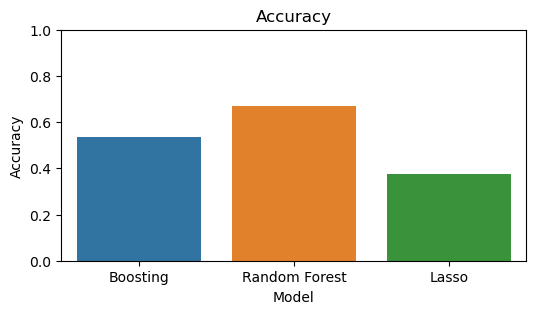

In [990]:
values = acc.values.flatten()
fig, ax = plt.subplots(figsize=(6,3))
sns.barplot( x=acc.columns,y=values, ax=ax)
ax.set_title('Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.ylim(0.0,1.0)
plt.show()

### Now i will measure the the avarage squares of the error, for that i will use the mean squard error function.
### The mean squared error is always 0 or positive. When a MSE is larger, this is an indication that the model does'nt accurately predict the model

In [1029]:
# Mean squared error per model
mse = pd.DataFrame(columns=['train', 'test'], index=['Lasso','RF','Boosting'])
 
model_dict = {'Lasso': lss, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
Lasso,195265.840805,11836.512475
RF,31077.611313,6251.154848
Boosting,184835.036824,8809.375536


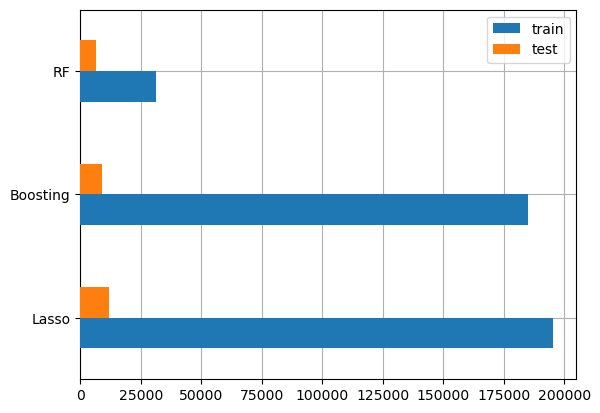

In [972]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### From the visualization and table above we can see that the Random Forest Regression model have less error then the others models

### Now we will use part of the data and try to predict they rent price by each model

In [973]:
predict = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['predict '+name] = model.predict(predict).round(1)

pd.DataFrame(pred_dict)

,y_true,predict Lasso,predict RF,predict Boosting
8389,1759.0,1325.5,2056.1,3596.8
43650,2350.0,490.0,2081.6,3596.8
7655,6000.0,7801.9,4676.8,3710.1
25199,6500.0,8313.2,7330.4,6393.4
30469,6500.0,5987.3,6025.2,6365.5


### From the table above we can see that the Random Forest model can predict and be the closest to the real price of the house.